In [ ]:
# 군집
# 데이터 포인트들을 별개의 군집으로 그룹화
# 유사성이 높은 데이터들을 동일한 그룹으로 분류하고 서로 다른 군집들이 상이성을 가지도록 그룹화

# 활용분야
# segmentation
# image 검출, 세분화, 트레킹
# 이상 검출

#### 군집화의 핵심은 유사성 ####

In [ ]:
# 군집은 타겟 벨류가 없음.
# 점을 임의로 k개로 선정하고 k점들과 가까운 점들을 선택하고 그 가운데로 이동,
# 점 선택하고 또 가운데로 이동... 반복

# 학습 데이터들을 k개 그룹(cluster)로 바꿈
# k개 클러스터의 중점(Centroid)을 임의로 부여한 후 각 중점과 가까운 점들을 찾는다.
# 중점과 가까운 점들의 평균 지점(무게중심)을 계산하여 각 클러스터의 새로운 중점으로 사용. 
# 새로운 중점과 가까운 점들을 다시 찾고, 평균 지점을 계산하여 또 새로운 클러스터의 중점으로 사용.
# 클러스터의 중점이 변하지 않을 때까지 반복. 

###### k-means ++ 알고리즘 ######
# 초기 중점을 좀 더 합리적으로 설정하는 방법 (거리가 멀게)
# 임의의 데이터 점을 처음부터 초기 중점을 잡아내기. 
# -> 그 다음 가장 거리가 먼 점을 초기 중점으로 잡아냄. -> 거리가 멀다는 것 자체가 서로 유사성이 없다는 것을 의미. 
# 유클리드 형 거리가 멈. -> 직선 거리가 멀다. 

In [1]:
##### 최적의 k를 찾는 방법. k-means elbow method ##### 
# 몇 개의 k를 찾아야 하는지?
# 정답에 해당하는 label이나 target이 없음. (측정 지표가 없음.)
# 군집화가 잘 되어있는 경우 각 중점과 해당 cluster내의 데이터들간의 거리 합이 작을 것.
# -> 이 거리의 합이 error(SSE)의 대용치로 쓸 수 있음. 
# k가 증가할 수록 SSE는 줄어든다. 하지만 k가 증가할수록 줄어도는 폭이 작아진다.
# k가 증가할 때 SSE가 줄어든긴 하지만, 줄어드는 폭이 갑자기 작아지는 지점의 k값을 최적 cluster 개수라 할 수 있다. 


##### 군집 평가, Silhouette K-means 품질평가 #####
# 응집력(cohesion)과 분리도(separation)을 사용한 실루엣(s) 계수로 평가
# 분리가 잘된 경우 실루엣 계수가 크지만, cluster가 겹치는 경우 계수가 작아진다.



##### DBSCAN ##### (군집 평가)
# density-based spatial clsutering of applications with noise
# 사람이 봤을 때는 합리적인 클러스터링이 예상이 갈 수 있지만,
# 하지만, 컴퓨터가 보기에는 어려울 수 있다.

# 밀집도 기반의 군집 알고리즘
# 밀집도는 특정반경 ℨ안에 있는 샘플 개수로 정의
# 반경 ℨ안에 있어야 할 최소 개수를 정의
# 데이터마다 반경 ℨ인 원을 그린 후 원 안에 있는 데이터 개수를 카운트

# 카운트 결과가 사전에 정의한 min points 이상이면 해당 데이터를 core point로 설정
# 카운트 결과가 min point 이하이면 border point나 noise point이 되며 나중에 원 안의 샘플 중
#      core point가 생기면 이 데이터는 border point로 표시 아니면 noise point로 표시. 


In [2]:
from sklearn.datasets import make_blobs # 종속변수가 없는 데이터 만듬
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [27]:
input_feature, _ = make_blobs(n_samples=400, centers=3,
                              cluster_std=.5, random_state=30)
input_feature[:5]

array([[ 2.75074449, -6.87817313],
       [ 3.31185818, -2.69956529],
       [ 9.60878036, -3.51315872],
       [ 3.06887975, -6.65719013],
       [ 9.13331047, -3.6763244 ]])

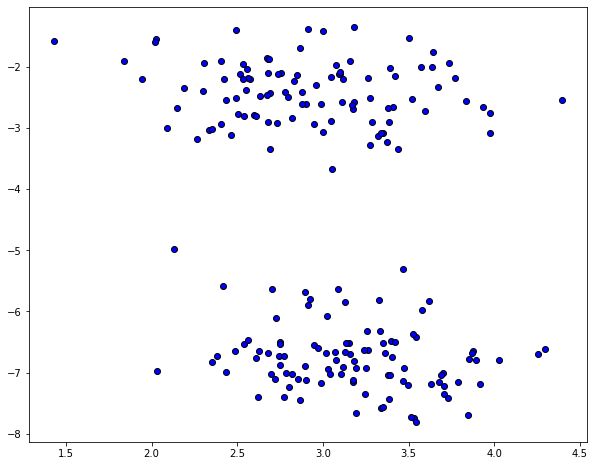

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(input_feature[:,0], input_feature[:,1],
            c='blue', edgecolor='k', lw=1)
plt.show()

In [16]:
model_r = KMeans(n_clusters=3, init='random').fit(input_feature)

In [17]:
center = model_r.cluster_centers_
center

array([[ 3.41944557, -2.68301814],
       [ 2.61689336, -2.26214757],
       [ 3.16904906, -6.76295691]])

In [18]:
c0 = center[0]
c1 = center[1]
c2 = center[2]

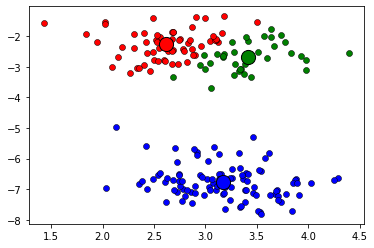

In [22]:
plt.scatter(input_feature[model_r.labels_ == 0, 0], input_feature[model_r.labels_ == 0, 1], marker='o', c='g', edgecolor='k', lw=0.5)
plt.scatter(input_feature[model_r.labels_ == 1, 0], input_feature[model_r.labels_ == 1, 1], marker='o', c='r', edgecolor='k', lw=0.5)
plt.scatter(input_feature[model_r.labels_ == 2, 0], input_feature[model_r.labels_ == 2, 1], marker='o', c='b', edgecolor='k', lw=0.5)
plt.scatter(c0[0], c0[1], s=200, c="g", edgecolor='k', lw=1)
plt.scatter(c1[0], c1[1], s=200, c="r", edgecolor='k', lw=1)
plt.scatter(c2[0], c2[1], s=200, c="b", edgecolor='k', lw=1)
plt.show()

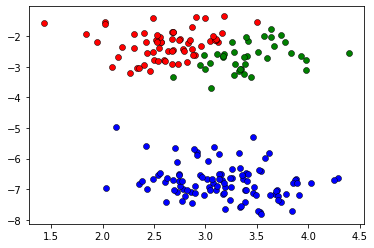

In [24]:
# k-means ++로 초기화 해보기
model_pp = KMeans(n_clusters=3, init="k-means++").fit(input_feature)

plt.scatter(input_feature[model_r.labels_ == 0, 0], input_feature[model_r.labels_ == 0, 1], marker='o', c='g', edgecolor='k', lw=0.5)
plt.scatter(input_feature[model_r.labels_ == 1, 0], input_feature[model_r.labels_ == 1, 1], marker='o', c='r', edgecolor='k', lw=0.5)
plt.scatter(input_feature[model_r.labels_ == 2, 0], input_feature[model_r.labels_ == 2, 1], marker='o', c='b', edgecolor='k', lw=0.5)
plt.show()

In [25]:
model_r.inertia_

83.74960203380338

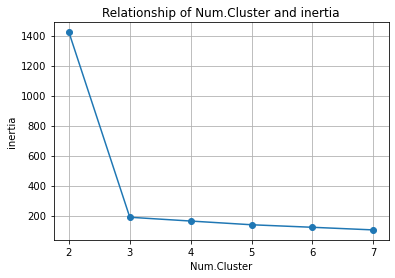

In [28]:
set_k = [k for k in range(2, 8)]
set_inertia = []
for k in set_k:
    model = KMeans(n_clusters=k)
    model.fit(input_feature)

    set_inertia.append(model.inertia_)

plt.plot(set_k, set_inertia, '-o')

plt.title('Relationship of Num.Cluster and inertia')
plt.xlabel('Num.Cluster')
plt.ylabel('inertia')
plt.xticks(set_k)
plt.grid()
plt.show()

# 2개에서 3개로 넘어갈 때 inertia 숫자가 크게 줄어듬.
# 이렇게 되면 최적의 k는 3으로 둠. -> 에러가 많이 줄어든 곳에서